In [30]:
from datascience import *
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
np.set_printoptions(legacy='1.13')

# THE DATASETS

In [31]:
gaza_daily_casualties = Table.read_table('casualties_daily_gaza_2025-04-12.csv')
gaza_daily_casualties

report_date,report_source,report_period,ext_massacres_cum,killed,killed_cum,ext_killed,ext_killed_cum,ext_killed_children_cum,ext_killed_women_cum,injured_cum,ext_injured,ext_injured_cum,ext_civdef_killed_cum,med_killed_cum,ext_med_killed_cum,press_killed_cum,ext_press_killed_cum
2023-10-07,mohtel,24,0,232,232,232,232,0,0,1610,1610,1610,0,6,6,1,1
2023-10-08,mohtel,24,0,138,370,138,370,78,41,1788,178,1788,0,nan,6,1,1
2023-10-09,mohtel,24,8,190,560,190,560,91,61,2271,483,2271,0,6,6,3,3
2023-10-10,mohtel,24,8,340,900,340,900,260,230,4000,1729,4000,0,nan,6,7,7
2023-10-11,gmotel,24,23,200,1100,200,1100,398,230,5184,1184,5184,0,10,10,nan,7
2023-10-12,mohtel,24,23,317,1417,317,1417,500,276,5763,579,5763,0,11,11,nan,7
2023-10-13,missing,24,23,483,1900,483,1900,500,392,nan,1475,7238,0,11,11,nan,7
2023-10-14,gmotel,24,23,328,2228,328,2228,600,600,8714,1476,8714,0,11,11,nan,7
2023-10-15,gmotel,24,23,442,2670,442,2670,700,735,9200,486,9200,0,nan,11,nan,7
2023-10-16,gmotel,24,371,138,2808,138,2808,853,936,10850,1650,10850,7,37,37,nan,7


In [32]:
west_bank_daily_casualties = Table.read_table('casualties_daily_west_bank_2025-04-12.csv')
west_bank_daily_casualties

report_date,verified.killed,verified.killed_cum,verified.injured,verified.injured_cum,verified.killed_children,verified.killed_children_cum,verified.injured_children,verified.injured_children_cum,killed_cum,killed_children_cum,injured_cum,injured_children_cum,settler_attacks_cum,flash_source
2023-10-07,6,6,197,197,2,2,31,31,3,0,23,1,3,un
2023-10-08,8,14,127,324,3,5,7,38,13,1,194,1,9,un
2023-10-09,4,18,88,412,0,5,19,57,15,3,295,34,19,un
2023-10-10,5,23,72,484,0,5,7,64,19,3,332,39,29,un
2023-10-11,6,29,85,569,2,7,17,81,26,3,427,62,39,un
2023-10-12,7,36,49,618,0,7,11,92,33,5,500,81,49,un
2023-10-13,17,53,613,1231,6,13,27,119,43,8,700,92,63,un
2023-10-14,3,56,13,1244,2,15,1,120,54,13,1150,106,67,un
2023-10-15,2,58,18,1262,1,16,2,122,61,15,1173,113,70,un
2023-10-16,2,60,23,1285,0,16,0,122,61,15,1176,113,70,un


In [33]:
killed_in_gaza = Table.read_table('killed-in-gaza.csv').relabeled(2,'Arabic name')
killed_in_gaza

Index,Name,Arabic name,Born,Age,Sex,ID number
1,Mohammed Hani Mohammed Al-Zahhar,محمد هاني محمد الزهار,8/9/2023,0,m,444196471
2,Nour Mohammed Aed Udwan,نور محمد عائد عدوان,2/27/2023,0,f,444484729
3,Khaled Mumin Amin Shabir,خالد مؤمن ام6 شبير,4/16/2023,0,m,444799647
4,Yamen Ibrahim Farid Qaddoura,يامن ابراهيم فريد قدوره,6/10/2023,0,m,445958408
5,Ahmed Rami Ahmed Abdel Qadir,أحمد رامي أحمد عبد القادر,12/22/2022,0,m,445808546
6,Houriya Ahmed Imran Ghaben,حورية أحمد عمران غD,4/10/2023,0,f,445639958
7,Zain Mohammed Khaled Al-Houbi,زين محمد خالد الهوبي,5/23/2023,0,m,444489579
8,Rakan Mumin Mousa Rabie,ركان مؤمن موسي ربيع,9/29/2023,0,m,444466494
9,Taysir Mohammed Taysir Al-Hassi,تيسير محمد تيسير الهسي,2/19/2023,0,m,444496053
10,Kenan Akram Samih Karim,كنان اكرم سميح كريم,8/5/2023,0,m,445362098


In [34]:
infrastructure_damaged = Table.read_table('infrastructure-damaged.csv')
infrastructure_damaged

report_date,civic_buildings__destroyed,civic_buildings__ext_destroyed,educational_buildings__destroyed,educational_buildings__ext_destroyed,educational_buildings__damaged,educational_buildings__ext_damaged,places_of_worship__mosques_destroyed,places_of_worship__ext_mosques_destroyed,places_of_worship__mosques_damaged,places_of_worship__ext_mosques_damaged,places_of_worship__churches_destroyed,places_of_worship__ext_churches_destroyed,residential__destroyed,residential__ext_destroyed
2023-10-07,nan,5,nan,1,nan,15,nan,2,nan,4,nan,0,nan,80
2023-10-08,nan,11,nan,1,nan,30,nan,4,nan,8,nan,0,159,159
2023-10-09,nan,16,nan,2,nan,45,nan,6,nan,12,nan,0,790,790
2023-10-10,nan,22,nan,2,nan,60,nan,8,nan,17,nan,0,1009,1009
2023-10-11,27,27,3,3,75,75,10,10,nan,21,nan,0,2835,2835
2023-10-12,nan,29,3,3,75,75,10,10,nan,25,nan,0,nan,4188
2023-10-13,nan,31,nan,9,nan,100,nan,12,nan,29,nan,0,5540,5540
2023-10-14,nan,33,14,14,124,124,nan,14,nan,33,nan,0,7000,7000
2023-10-15,nan,35,14,14,143,143,nan,16,nan,37,nan,0,8840,8840
2023-10-16,nan,37,18,18,150,150,nan,18,nan,41,nan,1,10500,10500


### Checking Missing Values
Before proceeding with data analysis, we need to identify missing values in each dataset to understand what needs to be handled.


In [35]:
# Check for missing values
def count_missing_columns(table):
    missing_counts = {}
    for column in table.labels:
        count = sum(1 for value in table.column(column) if value is None or value == "" or str(value).lower().strip() in ["missing", "nan", " "])
        if count > 0:  # Only print if there are missing values
            missing_counts[column] = count
    return missing_counts

print("Columns with missing values in each dataset:")
print("-" * 40)
print(f"Daily Casualties - Gaza (with total records of {gaza_daily_casualties.num_rows}):", count_missing_columns(gaza_daily_casualties))
print("-" * 40)
print(f"Daily Casualties - West Bank (with total records of {west_bank_daily_casualties.num_rows}):", count_missing_columns(west_bank_daily_casualties))
print("-" * 40)
print(f"Killed in Gaza (with total records of {killed_in_gaza.num_rows}):", count_missing_columns(killed_in_gaza))
print("-" * 40)
print(f"Infrastructure Damaged (with total records of {infrastructure_damaged.num_rows}):", count_missing_columns(infrastructure_damaged))
print("-" * 40)

Columns with missing values in each dataset:
----------------------------------------
Daily Casualties - Gaza (with total records of 551): {'report_source': 12, 'killed': 27, 'killed_cum': 7, 'injured_cum': 15, 'med_killed_cum': 417, 'press_killed_cum': 409}
----------------------------------------
Daily Casualties - West Bank (with total records of 551): {'verified.killed': 148, 'verified.killed_cum': 147, 'verified.injured': 162, 'verified.injured_cum': 160, 'verified.killed_children': 148, 'verified.killed_children_cum': 147, 'verified.injured_children': 162, 'verified.injured_children_cum': 160}
----------------------------------------
Killed in Gaza (with total records of 50020): {}
----------------------------------------
Infrastructure Damaged (with total records of 534): {'civic_buildings__destroyed': 451, 'educational_buildings__destroyed': 445, 'educational_buildings__damaged': 444, 'places_of_worship__mosques_destroyed': 453, 'places_of_worship__mosques_damaged': 464, 'place

### Dealing with the missing data from the "Daily Casualties - Gaza" table


In [36]:
#dealing with the missing data from the "Daily Casualties - Gaza" table

# Remove unwanted columns from the "Daily Casualties - Gaza" table
columns_to_remove = ["killed", "killed_cum", "injured_cum", "med_killed_cum", "press_killed_cum"]
processed_gaza_daily_casualties = gaza_daily_casualties.drop(*columns_to_remove)

# Save the updated CSV
processed_gaza_daily_casualties.to_csv("casualties_daily_gaza_cleaned.csv")
print(f"Daily Casualties - Gaza (with total records of {processed_gaza_daily_casualties.num_rows}):", count_missing_columns(processed_gaza_daily_casualties))

Daily Casualties - Gaza (with total records of 551): {'report_source': 12}


###  Rules for Filling Missing Values for "Daily Casualties - West Bank" Table

####  If the cumulative value is missing:
- **If a daily value is available** for that row:
  - Fill cumulative as:  
    `previous cumulative + current daily`
- **If daily is also missing**:
  - Use `previous cumulative` (assume no change)

####  If the daily value is missing:
- **If both previous and next cumulative values are available**:
  - Fill daily as:  
    `next cumulative - previous cumulative`
- **If only previous cumulative is available**:
  - Estimate daily as:  
    `1% of previous cumulative`

#### If both cumulative and daily values are missing for consecutive rows:
- **If cumulative values are available before and after the block**:
  - Interpolate linearly:
    - Spread the cumulative increase evenly across the missing days
    - Assign equal daily values for each missing day
- **If only previous cumulative is available**:
  - Estimate daily as:  
    `1% of previous cumulative`
  - Fill cumulative using:  
    `previous cumulative + estimated daily × number of days`
- **If no cumulative data is available before or after**:
  - Leave both values as `None`


In [37]:
def extrapolate_missing_values(table, cum_column, daily_column):
    cum_values = list(table.column(cum_column))  
    daily_values = list(table.column(daily_column))  

    for i in range(len(cum_values)):
        
        # Detect NaN values and convert them to None
        if isinstance(cum_values[i], float) and str(cum_values[i]).lower().strip() in ["nan", ""]:
            cum_values[i] = None
        if isinstance(daily_values[i], float) and str(daily_values[i]).lower().strip() in ["nan", ""]:
            daily_values[i] = None
            
    i = 0
    while i < len(cum_values):
        if cum_values[i] is None and daily_values[i] is None:

            start_idx = i
            while i < len(cum_values) and cum_values[i] is None and daily_values[i] is None:
                i += 1
            end_idx = i - 1

            prev_cum = cum_values[start_idx - 1] if start_idx > 0 else None
            next_cum = None
            for j in range(i, len(cum_values)):
                if cum_values[j] is not None:
                    next_cum = cum_values[j]
                    next_idx = j
                    break

            if prev_cum is not None and next_cum is not None:
                days_gap = next_idx - (start_idx - 1)
                avg_daily = max((next_cum - prev_cum) / days_gap, 0)
                for k in range(start_idx, end_idx + 1):
                    cum_values[k] = prev_cum + avg_daily * (k - (start_idx - 1))
                    daily_values[k] = avg_daily
            elif prev_cum is not None:

                for k in range(start_idx, end_idx + 1):
                    daily_values[k] = max(prev_cum * 0.01, 0)
                    cum_values[k] = cum_values[k - 1] + daily_values[k] if k > 0 else prev_cum + daily_values[k]
        else:
            i += 1

    for i in range(len(cum_values)):
        if cum_values[i] is None:
            if i > 0 and daily_values[i] is not None:
                cum_values[i] = max(cum_values[i - 1] + daily_values[i], cum_values[i - 1])
            elif i > 0:
                cum_values[i] = cum_values[i - 1]

        if daily_values[i] is None:
            prev_cum = cum_values[i - 1] if i > 0 else None
            next_cum = cum_values[i + 1] if i < len(cum_values) - 1 else None

            if prev_cum is not None and next_cum is not None:
                daily_values[i] = max(next_cum - prev_cum, 0)
            elif prev_cum is not None:
                daily_values[i] = max(prev_cum * 0.01, 0)

    new_table = table.with_columns(
        cum_column, cum_values,
        daily_column, daily_values
    )
    return new_table


In [38]:
daily_casualties_wb = extrapolate_missing_values(west_bank_daily_casualties, "verified.killed_cum", "verified.killed")
print(f"Daily Casualties - West Bank (with total records of {daily_casualties_wb.num_rows}):", count_missing_columns(daily_casualties_wb))

Daily Casualties - West Bank (with total records of 551): {'verified.injured': 162, 'verified.injured_cum': 160, 'verified.killed_children': 148, 'verified.killed_children_cum': 147, 'verified.injured_children': 162, 'verified.injured_children_cum': 160}


In [39]:
processed_west_bank_daily_casualties = west_bank_daily_casualties
processed_west_bank_daily_casualties = extrapolate_missing_values(processed_west_bank_daily_casualties, "verified.killed_cum", "verified.killed")
processed_west_bank_daily_casualties = extrapolate_missing_values(processed_west_bank_daily_casualties, "verified.injured_cum", "verified.injured")
processed_west_bank_daily_casualties = extrapolate_missing_values(processed_west_bank_daily_casualties, "verified.killed_children_cum", "verified.killed_children")
processed_west_bank_daily_casualties = extrapolate_missing_values(processed_west_bank_daily_casualties, "verified.injured_children_cum", "verified.injured_children")
print(f"Daily Casualties - West Bank (with total records of {processed_west_bank_daily_casualties.num_rows}):", count_missing_columns(processed_west_bank_daily_casualties))

Daily Casualties - West Bank (with total records of 551): {}


### Dealing with the missing data from the "Infrastructure Damaged" table


In [40]:
#dealing with the missing data from the "Daily Casualties - Gaza" table

# Remove unwanted columns from the "Daily Casualties - Gaza" table
columns_to_remove = [
    "civic_buildings__destroyed", 
    "educational_buildings__destroyed", 
    "educational_buildings__damaged", 
    "places_of_worship__mosques_destroyed", 
    "places_of_worship__mosques_damaged", 
    "places_of_worship__ext_mosques_damaged", 
    "places_of_worship__churches_destroyed", 
    "residential__destroyed"
]
processed_infrastructure_damaged = infrastructure_damaged.drop(*columns_to_remove)

# Save the updated CSV
processed_infrastructure_damaged.to_csv("infrastructure_damaged_cleaned.csv")
print(f"Infrastructure Damaged (with total records of {processed_infrastructure_damaged.num_rows}):", count_missing_columns(processed_infrastructure_damaged))

Infrastructure Damaged (with total records of 534): {}


# Exploratory Analysis & Visualization

# Plot 1

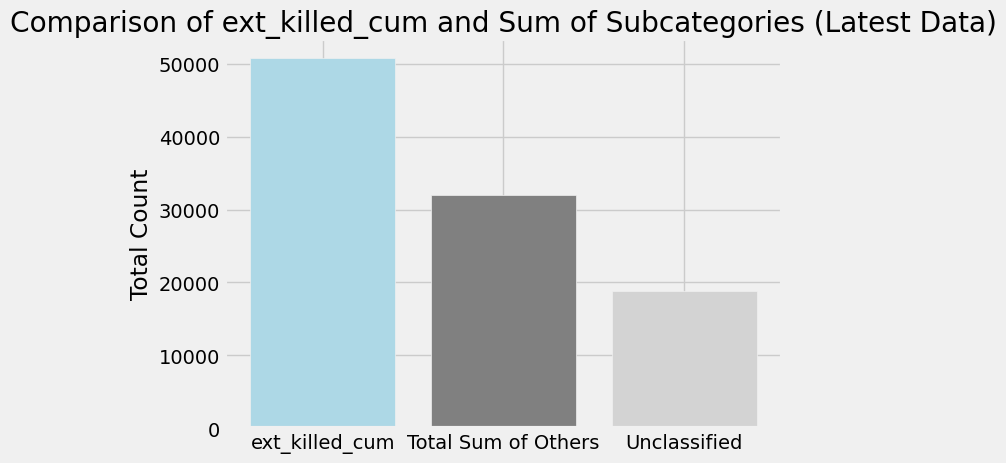

In [42]:
gaza_daily_casualties_sorted = processed_gaza_daily_casualties.sort("report_date", descending=True)

ext_columns = gaza_daily_casualties_sorted.select(
    "report_date", 
    "ext_killed_cum", 
    "ext_killed_children_cum", 
    "ext_killed_women_cum", 
    "ext_civdef_killed_cum", 
    "ext_med_killed_cum", 
    "ext_press_killed_cum"
)


latest_report = ext_columns.take(1)


total_sum = 0


columns_to_sum = [
    "ext_killed_children_cum", 
    "ext_killed_women_cum", 
    "ext_civdef_killed_cum", 
    "ext_med_killed_cum", 
    "ext_press_killed_cum"
]


for col in columns_to_sum:
    value = latest_report.column(col).item(0)
    if value is not None and value != '':
        total_sum += value

ext_killed_cum = latest_report.column("ext_killed_cum").item(0)


unclassified = ext_killed_cum - total_sum
categories = ['ext_killed_cum', 'Total Sum of Others', 'Unclassified']
values = [ext_killed_cum, total_sum, unclassified]

plt.bar(categories, values, color=['lightblue', 'grey', 'lightgray'])
plt.ylabel('Total Count')
plt.title('Comparison of ext_killed_cum and Sum of Subcategories (Latest Data)')
plt.show()


# Plot 2

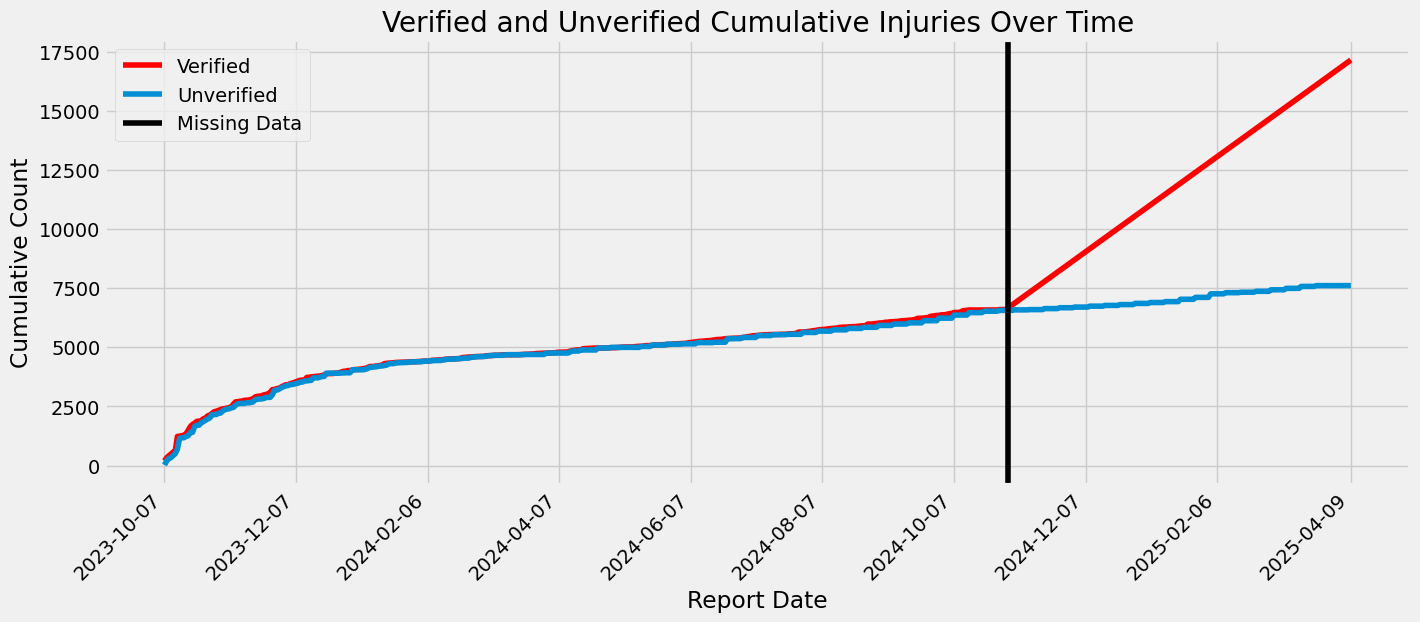

In [43]:
dates_str = processed_west_bank_daily_casualties.column('report_date')
verified_injured_cum = processed_west_bank_daily_casualties.column('verified.injured_cum')
injured_cum = processed_west_bank_daily_casualties.column('injured_cum')

plt.figure(figsize=(15, 5.5))

missing_date_str = '2024-11-01'

missing_index = np.where(dates_str == missing_date_str)[0][0] if missing_date_str in dates_str else len(dates_str)

plt.plot(dates_str, verified_injured_cum, color='red',label='Verified')
plt.plot(dates_str, injured_cum, label='Unverified')
plt.axvline(x=missing_date_str, color='black', label='Missing Data')

plt.xlabel('Report Date')
plt.ylabel('Cumulative Count')
plt.title('Verified and Unverified Cumulative Injuries Over Time')
plt.legend()

num_labels = 10
label_indices = np.linspace(0, len(dates_str) - 1, num_labels, dtype=int)
selected_dates = np.array(dates_str)[label_indices]
plt.xticks(selected_dates, rotation=45, ha='right')
plt.show()


# Plot 3

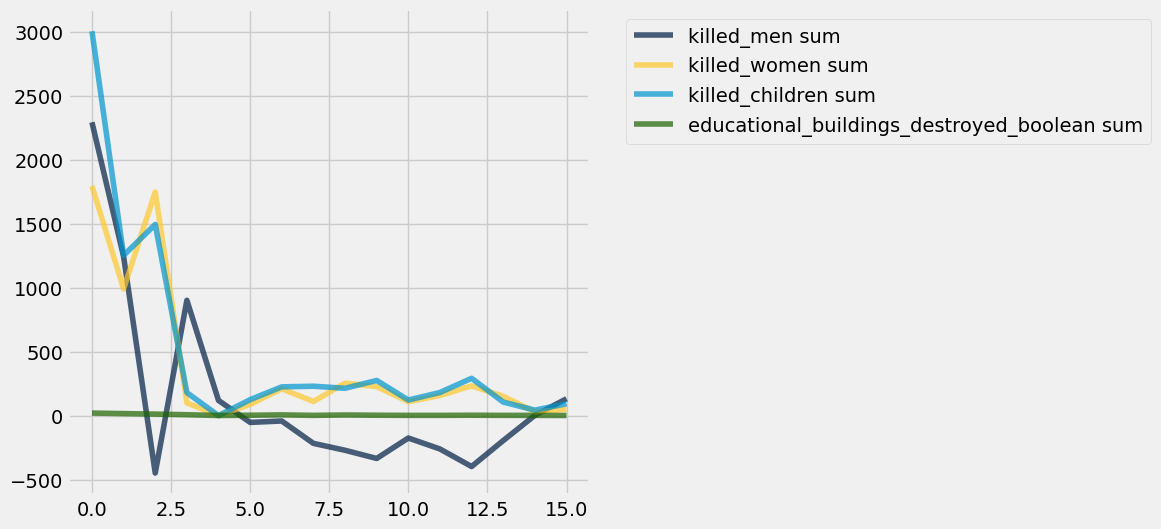

In [47]:
# Join daily casualties data with infrastructure damage data on the common key "report_date"
casualties_and_damage = processed_gaza_daily_casualties.join("report_date", processed_infrastructure_damaged, "report_date")

# Extract specific columns into arrays
ext_killed = casualties_and_damage.column("ext_killed")
educational_buildings_destroyed = casualties_and_damage.column("educational_buildings__ext_destroyed")
ext_killed_women_cum = casualties_and_damage.column("ext_killed_women_cum")
ext_killed_children_cum = casualties_and_damage.column("ext_killed_children_cum")

# Initialize arrays to store absolute (non-cumulative) counts
ext_killed_women_abs = make_array(ext_killed_women_cum[0])
ext_killed_children_abs = make_array(ext_killed_children_cum[0])
# Initialize boolean array tracking whether educational buildings were destroyed (increase detected)
educational_buildings_destroyed_boolean = make_array(educational_buildings_destroyed[0] > 0)

# Loop to compute day-by-day absolute counts (by subtracting previous day's cumulative count)
for i in np.arange(1, len(ext_killed)):
    ext_killed_women_abs = np.append(ext_killed_women_abs, ext_killed_women_cum[i] - ext_killed_women_cum[i-1])
    ext_killed_children_abs = np.append(ext_killed_children_abs, ext_killed_children_cum[i] - ext_killed_children_cum[i-1])
    educational_buildings_destroyed_boolean = np.append(
        educational_buildings_destroyed_boolean,
        educational_buildings_destroyed[i] > educational_buildings_destroyed[i-1]
    )

# Compute men killed per day by subtracting women and children from total
ext_killed_men_abs = make_array()
for i in np.arange(0, len(ext_killed)):
    men_killed = ext_killed[i] - ext_killed_women_abs[i] - ext_killed_children_abs[i]
    ext_killed_men_abs = np.append(ext_killed_men_abs, men_killed)

# Create a new table with daily deaths by demographic group + educational damage boolean
daily_demographic_deaths = casualties_and_damage.select("report_date").with_columns(
    "killed_men", ext_killed_men_abs,
    "killed_women", ext_killed_women_abs,
    "killed_children", ext_killed_children_abs,
    "educational_buildings_destroyed_boolean", educational_buildings_destroyed_boolean
)

# Helper function to extract month from date string (YYYY-MM-DD)
def getMonth(date):
    return int(date.split("-")[1])

# Helper function to extract year from date string (YYYY-MM-DD)
def getYear(date):
    return int(date.split("-")[0])

# Filter data for days when educational buildings were damaged
deaths_on_edu_damage_days = daily_demographic_deaths.where("educational_buildings_destroyed_boolean")

# Extract year and month from each report_date
years = deaths_on_edu_damage_days.apply(getYear, 'report_date')
months = deaths_on_edu_damage_days.apply(getMonth, 'report_date')

# Add year and month columns to the filtered table
deaths_on_edu_damage_days = deaths_on_edu_damage_days.with_columns('year', years, 'month', months)

# Group data by year and month, summing up all columns
deaths_on_edu_damage_days = deaths_on_edu_damage_days.group(['year', 'month'], np.sum)

# Drop unnecessary columns before plotting
deaths_on_edu_damage_days.drop("year", "month", "report_date sum", "educational_buildings_destroyed_boolean sum").plot()

# Plot 4

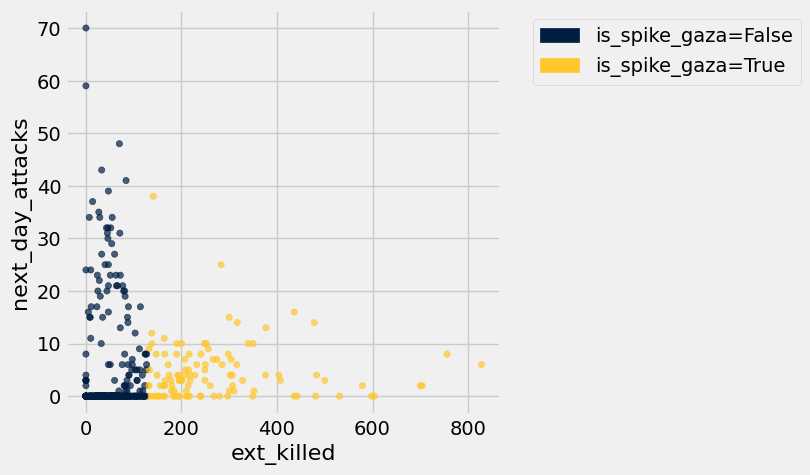

In [69]:
# define Gaza spike threshold
gaza_spike_threshold = np.percentile(processed_gaza_daily_casualties.column('ext_killed'), 80)

# select relevant columns from each dataset
gaza_deaths_daily = processed_gaza_daily_casualties.select('report_date', 'ext_killed')
wb_attacks_cumulative = processed_west_bank_daily_casualties.select('report_date', 'settler_attacks_cum')

# join tables by date
joined_gaza_wb = gaza_deaths_daily.join('report_date', wb_attacks_cumulative)

# label Gaza spike days
is_spike_gaza = []
for deaths in joined_gaza_wb.column('ext_killed'):
    is_spike_gaza.append(deaths > gaza_spike_threshold)
joined_gaza_wb = joined_gaza_wb.with_column('is_spike_gaza', is_spike_gaza)

# compute next-day settler attacks
next_day_attacks = []
for i in np.arange(joined_gaza_wb.num_rows):
    if i < joined_gaza_wb.num_rows - 1:
        today = joined_gaza_wb.column('settler_attacks_cum')[i]
        tomorrow = joined_gaza_wb.column('settler_attacks_cum')[i + 1]
        next_day_attacks.append(tomorrow - today)
    else:
        next_day_attacks.append(np.nan)
joined_gaza_wb = joined_gaza_wb.with_column('next_day_attacks', next_day_attacks)

# remove last row (has no tomorrow)
joined_gaza_wb = joined_gaza_wb.take(np.arange(joined_gaza_wb.num_rows - 1))

# filter out negative next_day_attacks
clean_report_date = []
clean_ext_killed = []
clean_is_spike = []
clean_next_day_attacks = []

for i in np.arange(joined_gaza_wb.num_rows):
    # there was a negative value due to what I believe is a false report or typo in data entry of the cumulative value
    if joined_gaza_wb.column('next_day_attacks')[i] >= 0: 
        clean_report_date.append(joined_gaza_wb.column('report_date')[i])
        clean_ext_killed.append(joined_gaza_wb.column('ext_killed')[i])
        clean_is_spike.append(joined_gaza_wb.column('is_spike_gaza')[i])
        clean_next_day_attacks.append(joined_gaza_wb.column('next_day_attacks')[i])

# create final analysis table
gaza_wb_spike_effects = Table().with_columns(
    'report_date', clean_report_date,
    'ext_killed', clean_ext_killed,
    'is_spike_gaza', clean_is_spike,
    'next_day_attacks', clean_next_day_attacks
)

gaza_wb_spike_effects.scatter('ext_killed', 'next_day_attacks', group='is_spike_gaza')

# Plot 5

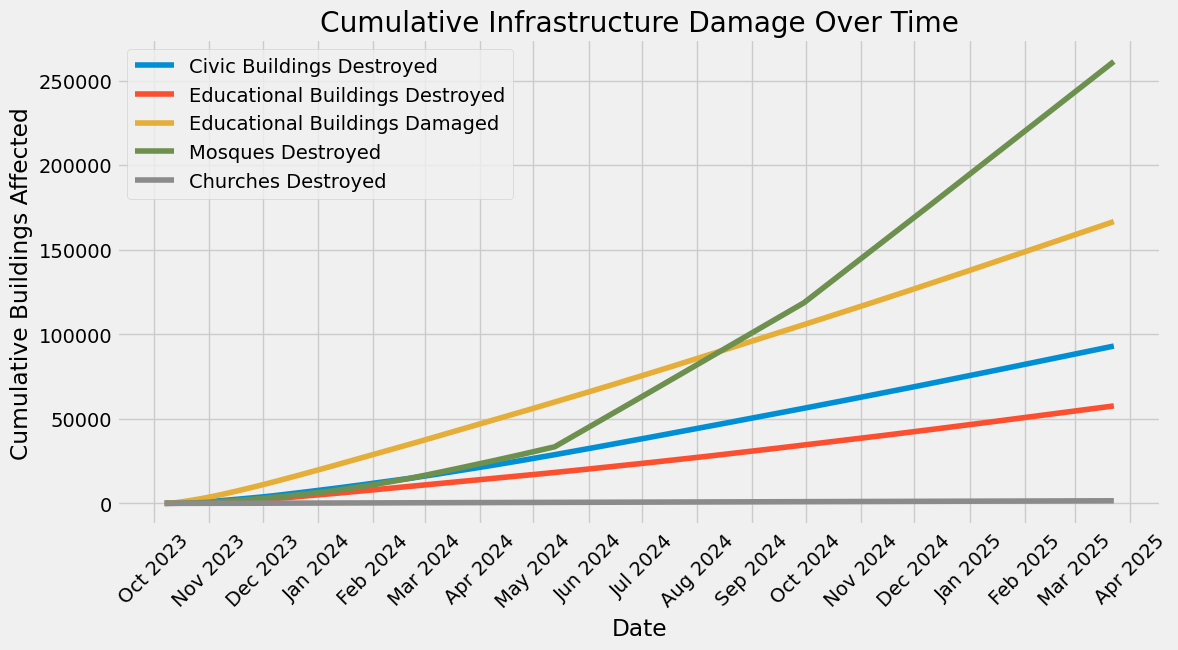

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime #had to import this library to show the dates as month/date 

# Convert report_date to datetime format
dates = [datetime.strptime(date, "%m/%d/%Y") for date in processed_infrastructure_damaged["report_date"]]

# Compute cumulative damage for each category
civic_cumulative = np.cumsum(processed_infrastructure_damaged["civic_buildings__ext_destroyed"])
education_cumulative = np.cumsum(processed_infrastructure_damaged["educational_buildings__ext_destroyed"])
education_damaged_cumulative = np.cumsum(processed_infrastructure_damaged["educational_buildings__ext_damaged"])
mosques_cumulative = np.cumsum(processed_infrastructure_damaged["places_of_worship__ext_mosques_destroyed"])
churches_cumulative = np.cumsum(processed_infrastructure_damaged["places_of_worship__ext_churches_destroyed"])
# residential_cumulative = np.cumsum(processed_infrastructure_damaged["residential__ext_destroyed"]) 

# Plot cumulative damage trends with formatted x-axis
plt.figure(figsize=(12, 6))
plt.plot(dates, civic_cumulative, label="Civic Buildings Destroyed")
plt.plot(dates, education_cumulative, label="Educational Buildings Destroyed")
plt.plot(dates, education_damaged_cumulative, label="Educational Buildings Damaged")
plt.plot(dates, mosques_cumulative, label="Mosques Destroyed")
plt.plot(dates, churches_cumulative, label="Churches Destroyed")
# plt.plot(dates, residential_cumulative, label="Residential Destroyed")

plt.xlabel("Date")
plt.ylabel("Cumulative Buildings Affected")
plt.title("Cumulative Infrastructure Damage Over Time")

# Format x-axis to show Month-Year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Show ticks per month
plt.xticks(rotation=45)  # Improve readability

plt.legend()
plt.grid(True)

plt.show()


# Plot 6

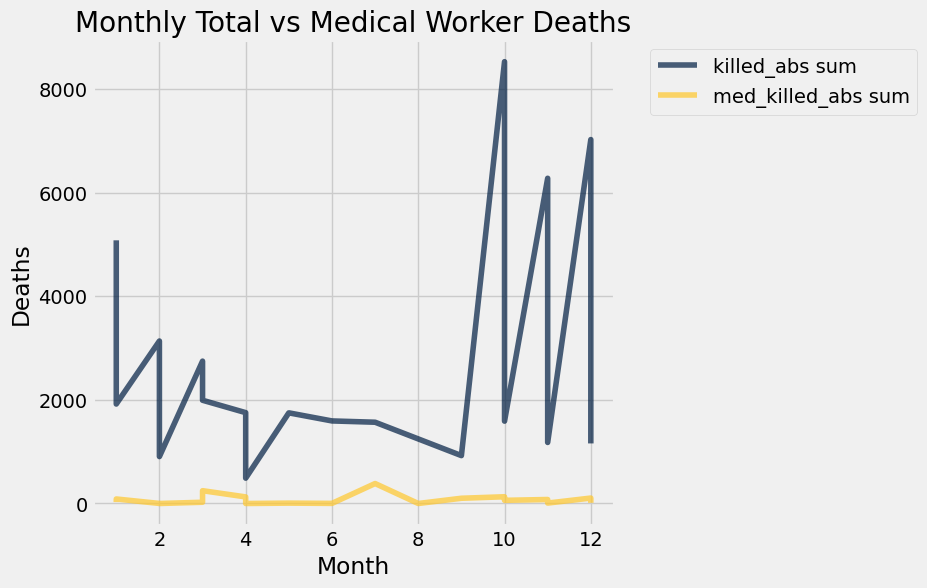

In [71]:
ext_killed = processed_gaza_daily_casualties.column("ext_killed")
ext_med_killed_cum = processed_gaza_daily_casualties.column("ext_med_killed_cum")

# Convert cumulative med worker deaths to absolute daily values
ext_med_killed_abs = make_array(ext_med_killed_cum[0])
for i in np.arange(1, len(ext_med_killed_cum)):
    daily_diff = ext_med_killed_cum[i] - ext_med_killed_cum[i - 1]
    ext_med_killed_abs = np.append(ext_med_killed_abs, daily_diff)

# Create table with absolute daily deaths
total_vs_med_killed = Table().with_columns(
    'date', processed_gaza_daily_casualties.column("report_date"),
    'killed_abs', ext_killed,
    'med_killed_abs', ext_med_killed_abs
)



# Extract month and year from each date
months = total_vs_med_killed.apply(getMonth, 'date')
years = total_vs_med_killed.apply(getYear, 'date')

# Add month and year to the table
total_vs_med_killed = total_vs_med_killed.with_columns(
    'month', months,
    'year', years
)

# Group by year and month to get monthly sums
monthly_deaths = total_vs_med_killed.group(['year', 'month'], np.sum)

# Plot monthly totals
monthly_deaths.drop('date sum',"year").plot("month")
plt.title("Monthly Total vs Medical Worker Deaths")
plt.xlabel("Month")
plt.ylabel("Deaths")
plt.show()

# Hypothesis Testing 1

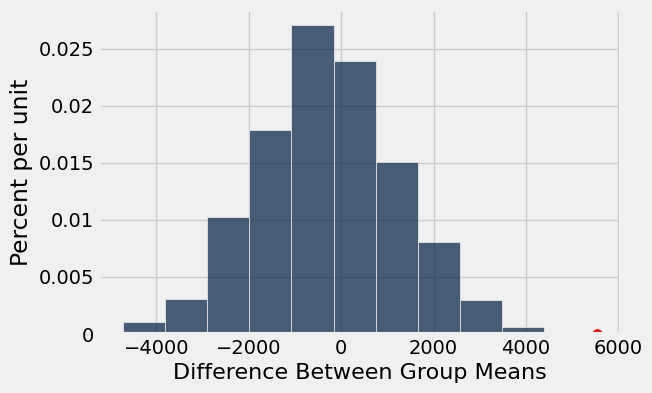

In [54]:
# === Continuing from plot3 ===

# Calculate the observed difference between children and men killed 
# on days when educational buildings were damaged (True = row(1))
h3_observed_difference = (
    daily_demographic_deaths
    .group("educational_buildings_destroyed_boolean", np.sum)
    .row(1)
    .item('killed_children sum') 
    - 
    daily_demographic_deaths
    .group("educational_buildings_destroyed_boolean", np.sum)
    .row(1)
    .item('killed_men sum')
)

# Function to run one permutation simulation: randomly shuffle the damage labels
# and compute the difference between children and men deaths under the new labels
def one_simulated_difference():
    shuffled_labels = daily_demographic_deaths.sample(with_replacement=False).column('educational_buildings_destroyed_boolean')
    shuffled_table = daily_demographic_deaths.with_column('Shuffled Label', shuffled_labels)
    return (
        shuffled_table.group('Shuffled Label', np.sum).row(1).item('killed_children sum') 
        - 
        shuffled_table.group('Shuffled Label', np.sum).row(1).item('killed_men sum')
    )

# Run 1000 simulations to build the empirical distribution of the test statistic
differences = make_array()
for i in np.arange(1000):
    differences = np.append(differences, one_simulated_difference())

# Plot the empirical distribution of differences under the null
Table().with_column('Difference Between Group Means', differences).hist()

# Overlay the observed difference as a red dot
plt.scatter(h3_observed_difference, 0, color='red', s=50, label='Observed Difference')

# Hypothesis Testing 2

- Null Hypothesis:
There is no difference in the average number of settler attacks the day after Gaza spike days and non-spike days.

- Alternative Hypothesis:
The average number of settler attacks is greater on the day following Gaza spike days than on non-spike days.​

- Test statistic (difference of means):
  average no. of settler attacks following spike days - average no. of settler attacks following non-spike days

- Chosen significance level: 0.05

In [49]:
def p2_compute_test_statistic(attack_values, spike_labels):
    """Return the difference in means between spike and non-spike days."""
    spike_values = []
    non_spike_values = []

    for i in np.arange(len(attack_values)):
        if spike_labels[i]:
            spike_values.append(attack_values[i])
        else:
            non_spike_values.append(attack_values[i])

    return np.mean(spike_values) - np.mean(non_spike_values)

In [50]:
def p2_simulate_null_distribution(attack_table, num_simulations):
    """Return list of simulated test stats by shuffling spike labels."""
    test_statistics = []
    original_attacks = attack_table.column('next_day_attacks')
    original_labels = attack_table.column('is_spike_gaza')

    for _ in np.arange(num_simulations):
        shuffled_labels = attack_table.select('is_spike_gaza').sample(with_replacement=False).column('is_spike_gaza')
        test_stat = p2_compute_test_statistic(original_attacks, shuffled_labels)
        test_statistics.append(test_stat)

    return test_statistics

In [51]:
# compute observed test statistic
p2_observed_stat = p2_compute_test_statistic(
    gaza_wb_spike_effects.column('next_day_attacks'),
    gaza_wb_spike_effects.column('is_spike_gaza')
)
print("Observed Test Statistic:", p2_observed_stat)

Observed Test Statistic: 1.07595913261


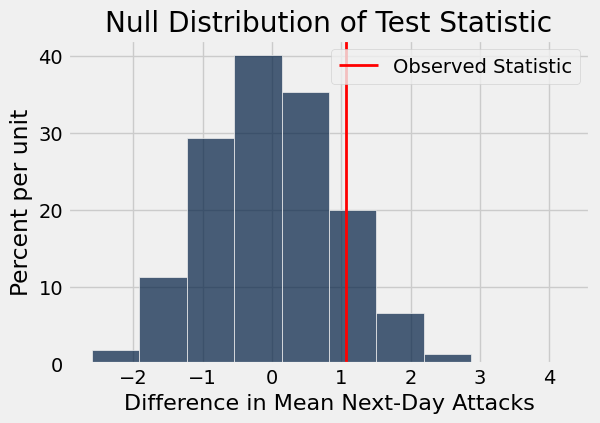

In [52]:
# run simulation
p2_num_repetitions = 5000
p2_null_distribution = p2_simulate_null_distribution(gaza_wb_spike_effects.select('next_day_attacks', 'is_spike_gaza'), p2_num_repetitions)
Table().with_column('Simulated Test Statistics', p2_null_distribution).hist()

# draw vertical line for the observed statistic
plt.axvline(p2_observed_stat, color='red', linewidth=2, label='Observed Statistic')

# add labels and legend
plt.title("Null Distribution of Test Statistic")
plt.xlabel("Difference in Mean Next-Day Attacks")
plt.legend()

plt.show()

In [53]:
# compute p-value
p2_p_value = np.count_nonzero(np.array(p2_null_distribution) >= p2_observed_stat) / p2_num_repetitions
print("P-value:", p2_p_value)

P-value: 0.133


- Conclusion: Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. This means there is not enough statistical evidence to conclude that Gaza spike days are associated with a significantly higher number of settler attacks the following day.